### Grades
LinkedIn: Python Statistics (Michele Vallisneri)

In [19]:
import math
import io

In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [21]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [22]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

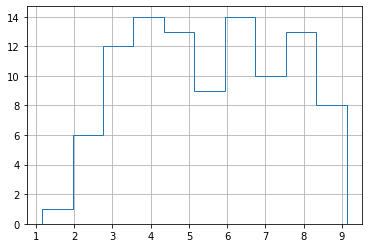

In [6]:
pop.grade.hist(histtype='step')

In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [8]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.482447
std,2.078081
min,1.983167
25%,3.707078
50%,5.844761
75%,7.395195
max,9.120705


In [9]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

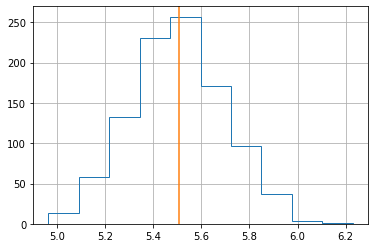

In [10]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

In [11]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.134912543776609, 5.879682915376263)

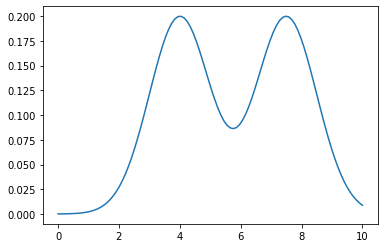

In [12]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)
x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [13]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [14]:
draw()

3.0902323768542876

In [15]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

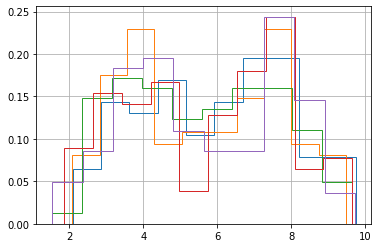

In [16]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [17]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

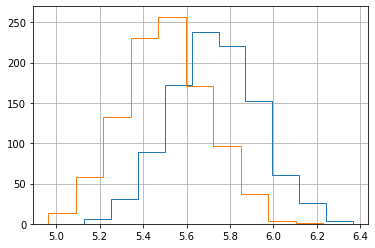

In [18]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

In [23]:
pop = pd.read_csv('grades.csv')

<AxesSubplot:>

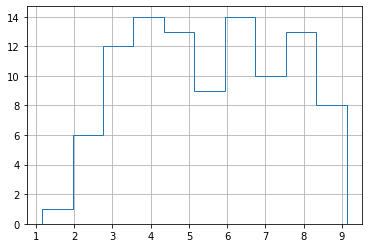

In [24]:
pop.grade.hist(histtype='step')

In [25]:
scipy.stats.percentileofscore(pop.grade,5)

43.0

In [26]:
bootstrap = pd.DataFrame({'passing': [scipy.stats.percentileofscore(pop.sample(100,replace=True).grade,5) for i in range(1000)]})

<AxesSubplot:>

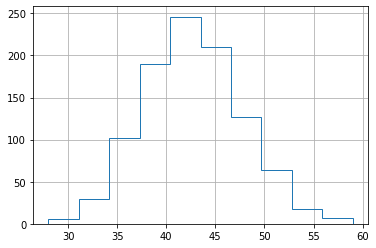

In [27]:
bootstrap.passing.hist(histtype='step')

In [28]:
bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(33.0, 52.02499999999998)